In [6]:
import importlib
import numpy as np
import os
from skimage import io
from PIL import Image, ImageDraw
import matplotlib.colors as mcolors
import random
import matplotlib.pyplot as plt


## HE Images

In [19]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def TakeOutBrightBack(pic, thresh, maskthresh):
    pic=np.array(pic/np.max(pic)*255).astype(np.uint8)

    thresh_pic=np.where(pic>thresh, 1000, pic)
    plt.title("Image Threshold")
    plt.imshow(thresh_pic)
    plt.show()

    #Applying a convolutional filter to find the emptier regions-
    testimage=thresh_pic
    emptyarray=np.zeros(testimage.shape)
    kernsize=30

    for i in range(testimage.shape[0]):
        for j in range(testimage.shape[1]):
            #print(i,j)
            step=np.floor(kernsize/2)
            #accounting for edgecases-
            if i<step+1:
                stepd=int(i)
                stepu=int(step)
        
            if j<step+1:
                stepl=int(j)
                stepr=int(step)
        
            if i>testimage.shape[0]-step-1:
                stepd=int(step)
                stepu=int(testimage.shape[0]-i)
            
            if j>testimage.shape[1]-step-1:
                stepl=int(step)
                stepr=int(testimage.shape[1]-j)
    
            chunk=testimage[i-stepd:i+stepu,j-stepl:j+stepr]
        
            ysize=stepu+stepd
            xsize=stepl+stepr
            chunksize=ysize*xsize        
            pictot=np.sum(chunk)/chunksize

            emptyarray[i,j]=pictot
        
    #Make Mask
    Mask=np.where(emptyarray>maskthresh,0,1)
    plt.title("Mask Binary")
    plt.imshow(Mask)
    plt.show()

    #Apply Mask
    Maskpic=Mask*pic
    plt.title("Masked Image")
    plt.imshow(Maskpic)
    plt.show()

    return(Maskpic)


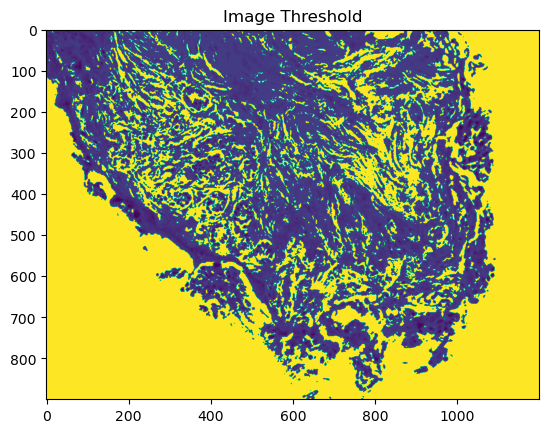

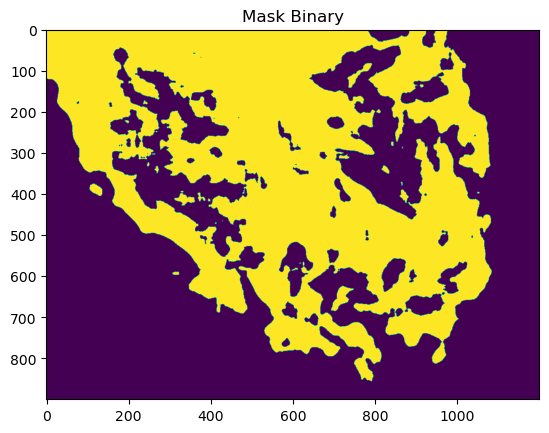

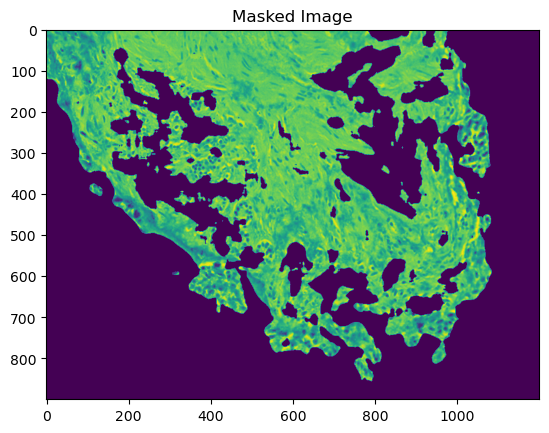

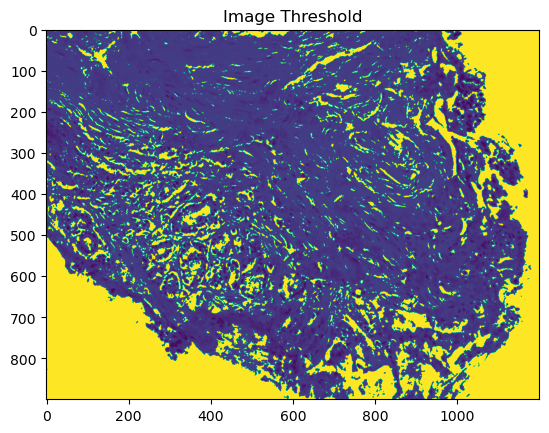

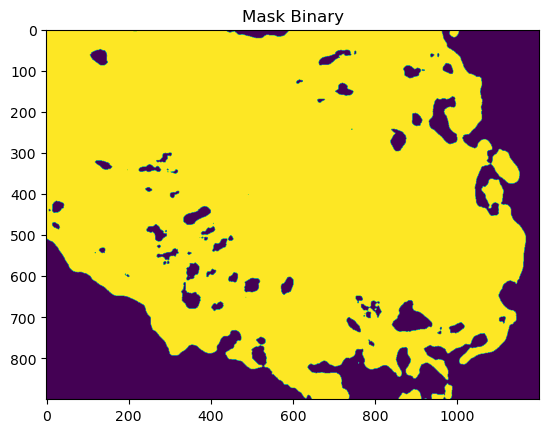

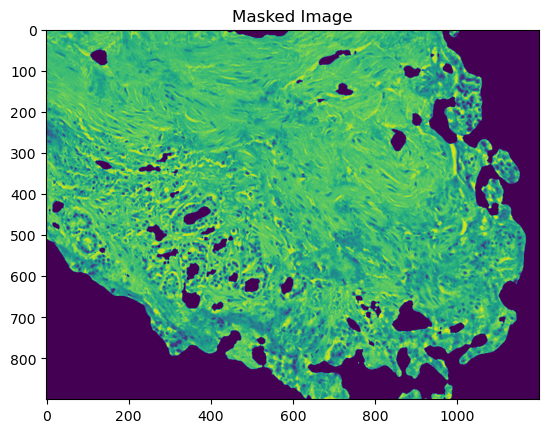

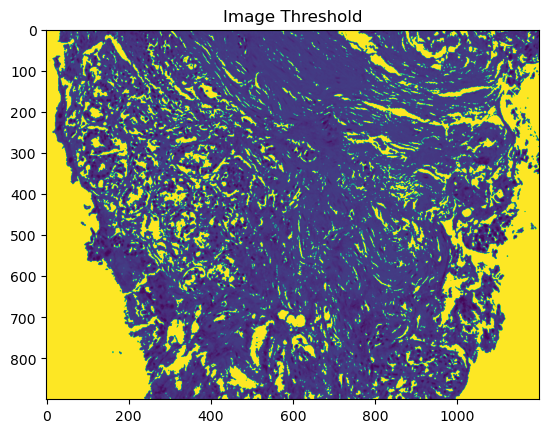

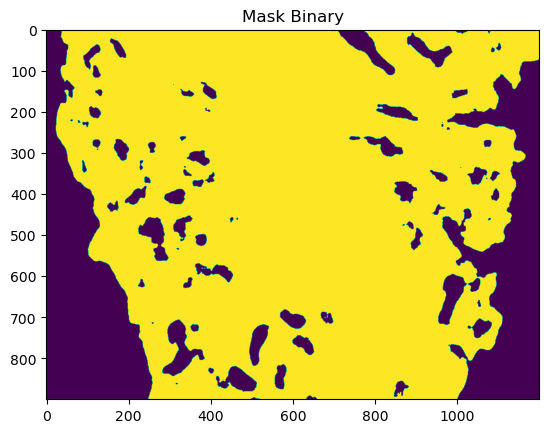

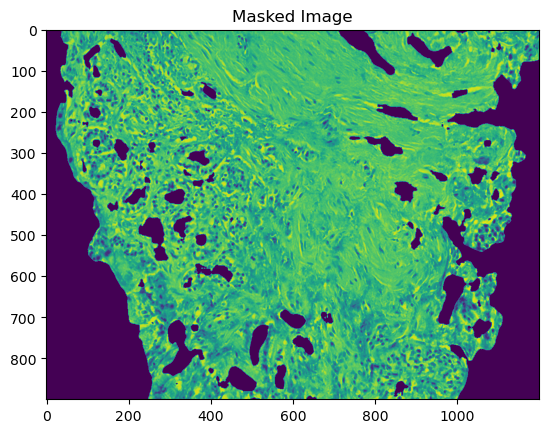

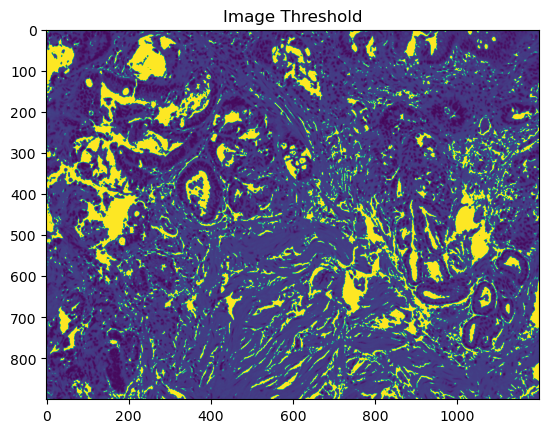

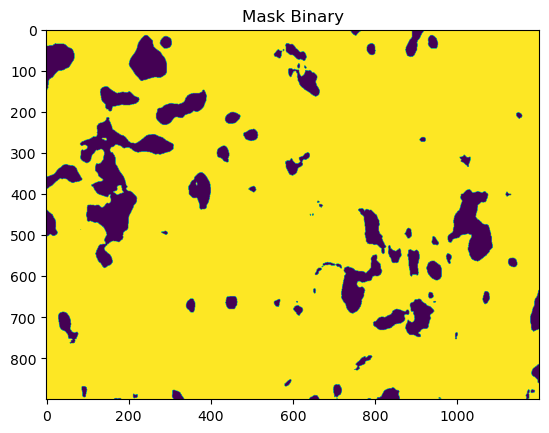

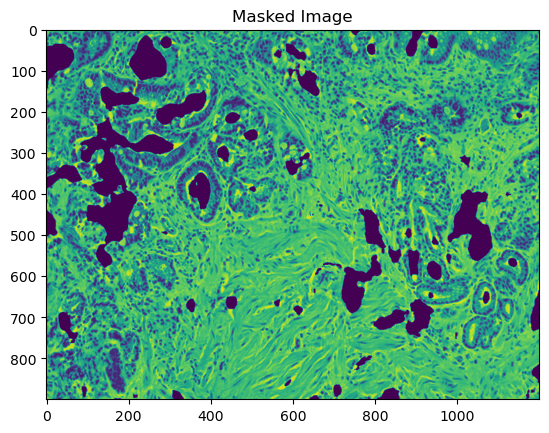

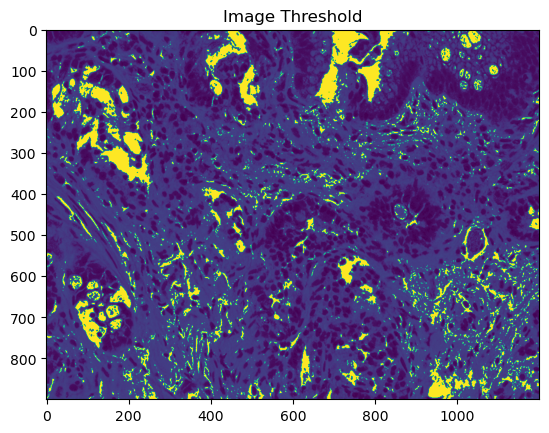

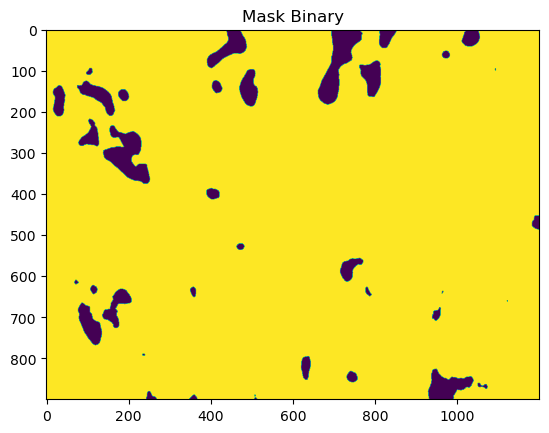

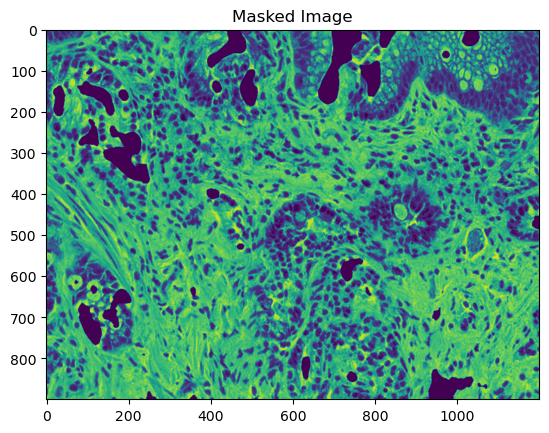

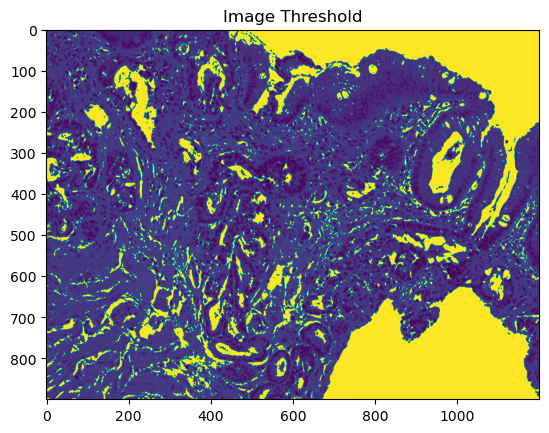

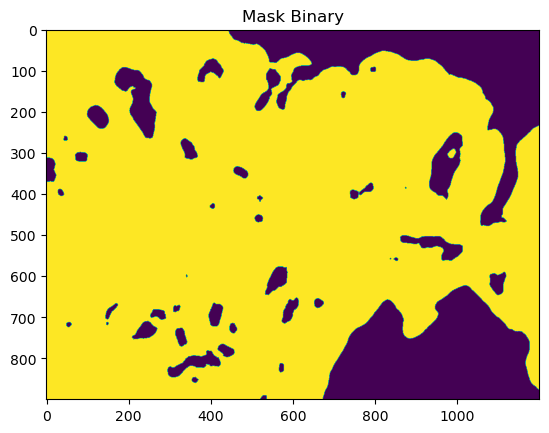

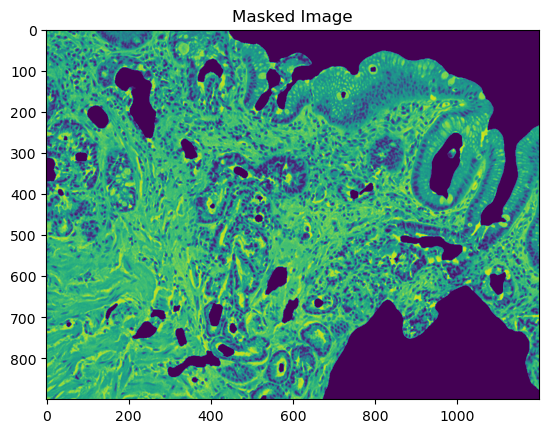

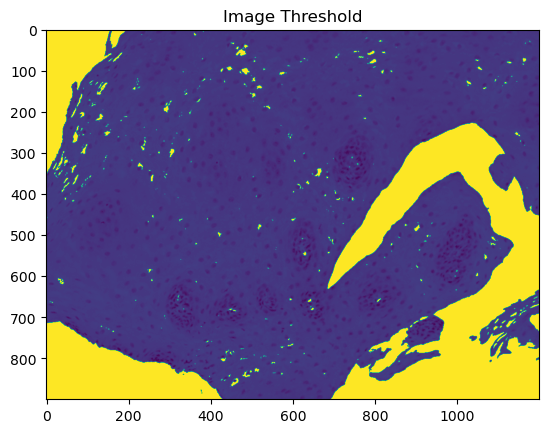

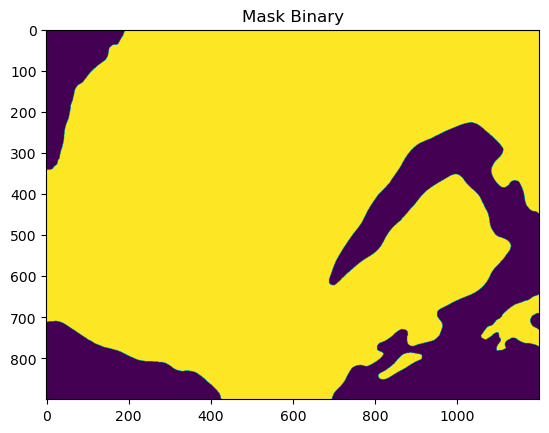

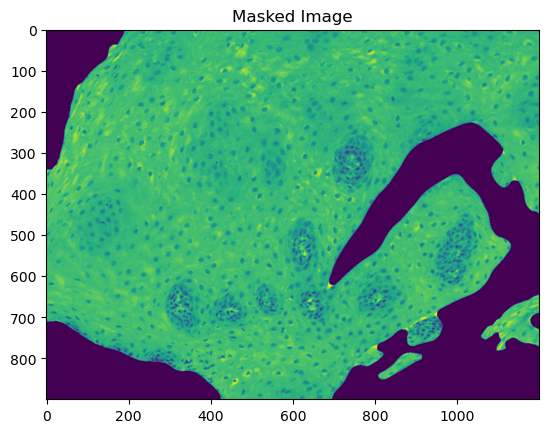

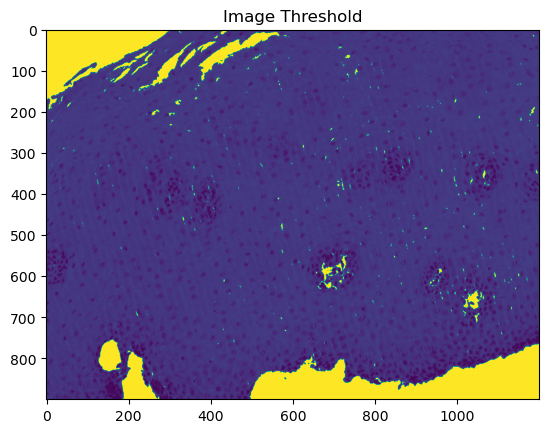

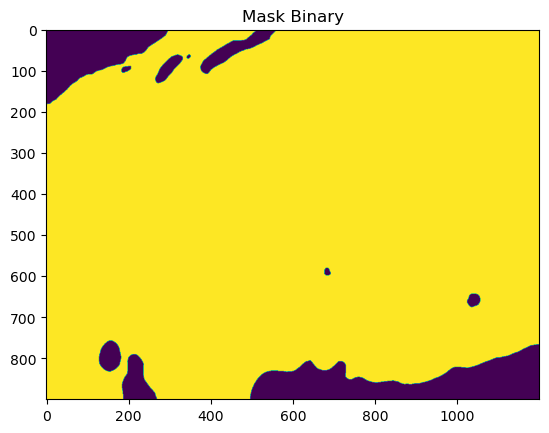

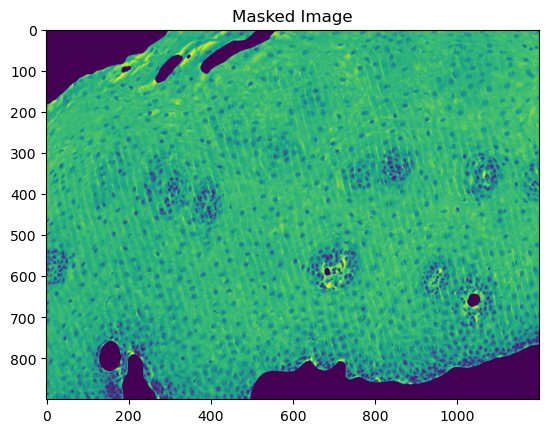

In [21]:
#working with slide image set-
dir_path = r"C:\Users\justinamb\Desktop\TextureCode\Images\SlideTestSet"

# Change the directory 
os.chdir(dir_path) 

imageset=[]
# iterate through all file 
for file in os.listdir(): 
    # Check whether file is in text format or not
    pic=np.array(io.imread(file))
    #If using rgb images to start-
    pic = rgb2gray(pic)
    #apply masking function, two parameters can be adjusted to set where the masking threshold is.
    maskedpic=TakeOutBrightBack(pic, 200, 500)
    imageset.append(maskedpic)
    

In [24]:
namelist=[]
for i in os.listdir():
    print(os.path.splitext(i)[0])
    namelist.append(os.path.splitext(i)[0])

for i in range(len(imageset)):
    im = Image.fromarray(imageset[i].astype(np.uint8))
    filename=namelist[i]+"masked"+".png"
    savepath=os.path.join(r"C:\Users\justinamb\Desktop\TextureCode\Images\SlideTestSet\PreprocessedIms",filename)
    im1 = im.save(savepath)

ID247MassAdj10x1_75
ID247MassAdj10x2_78
ID247MassAdj10x3_79
ID259Bar10x1_32
ID259Bar10x1_33
ID259Bar10x3_36
ID259Norm10x1_26
ID259Norm10x2_28
PreprocessedIms


## OCT Data

In [26]:
#Load in an OCT file-
folderpath=r"Q:\BOOM\EsophagealCancerStudy\Data_For_Processing\ID275\Normal\OCT\OCT.tif"
oct_cube = np.array(io.imread(folderpath))
print(oct_cube.shape)

(275, 330, 1011, 4)


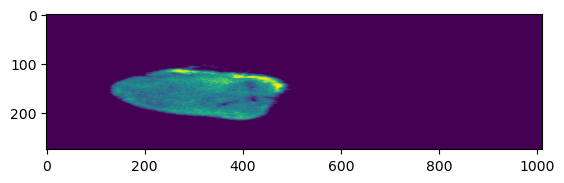

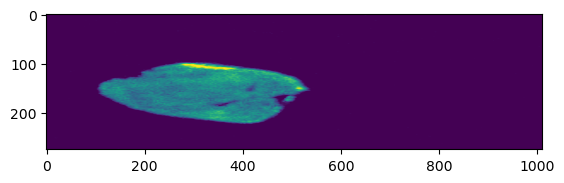

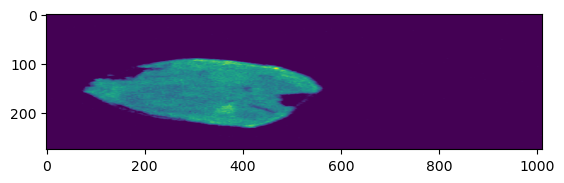

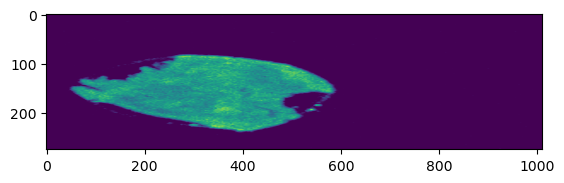

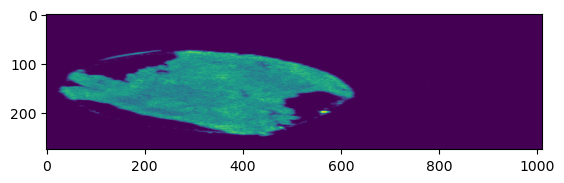

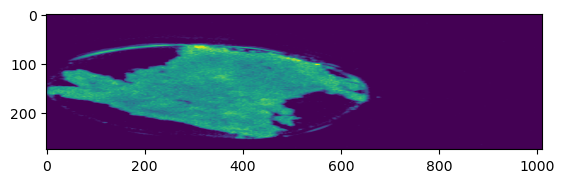

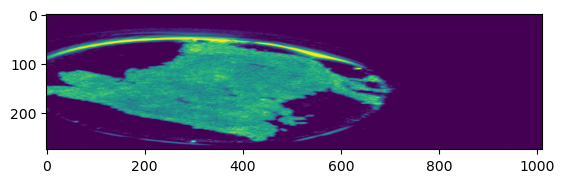

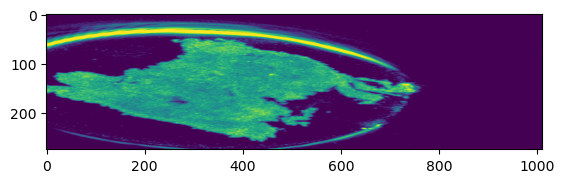

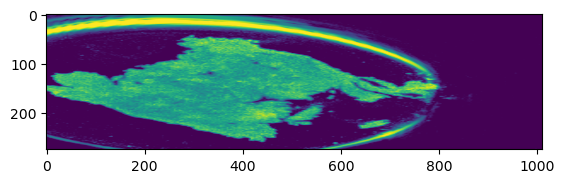

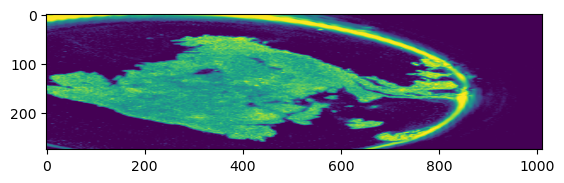

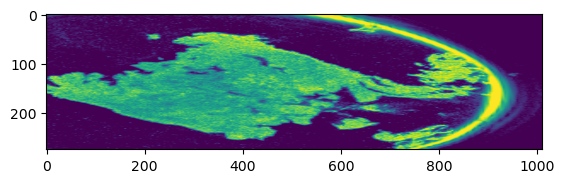

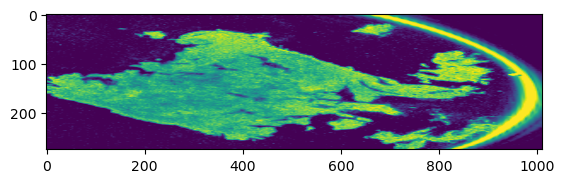

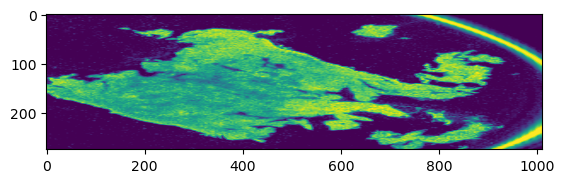

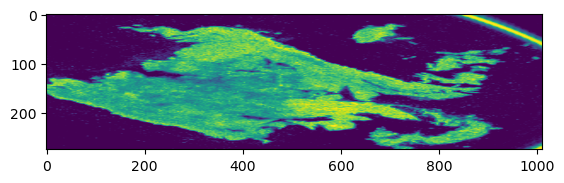

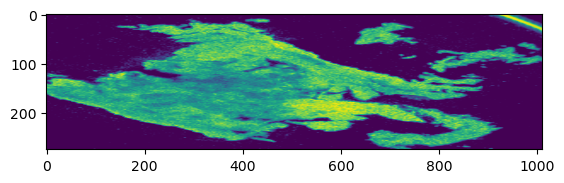

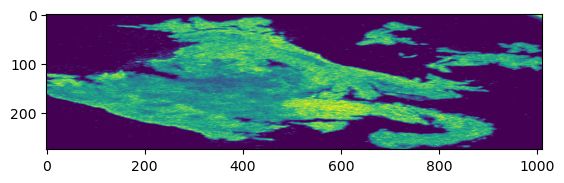

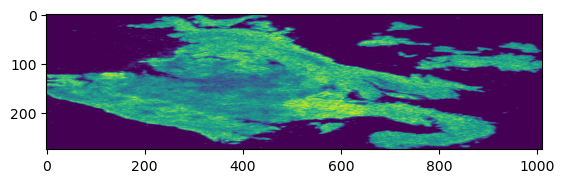

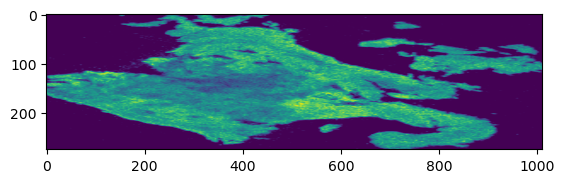

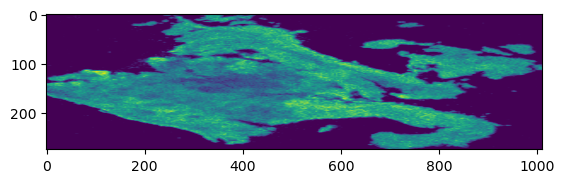

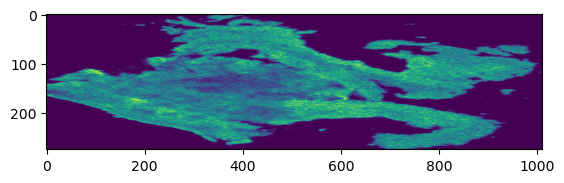

In [32]:
#OCT Breakdown fnc-
for i in range(20):
    #Parameters of oct datacube can be adjusted to save images in different dimensions and ranges-
    #Can also be tweaked to crop out artifacts
    imup=oct_cube[:,10*i,:,0]
    plt.imshow(imup)
    plt.show()
    
    im = Image.fromarray(imup)  
    filename="Textim"+str(i)+".png"
    savepath=os.path.join(r"C:\Users\justinamb\Desktop\TextureCode\Images\OCTims",filename) 
    im1 = im.save(savepath)
                